In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [8]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def foward(self,input):
        pass

    def backward(self,output_gradient,learning_rate):
        pass


In [9]:
class Dense(Layer):
    def __init__(self,input_size,output_size):
        self.weights = np.random.randn(output_size,input_size)
        self.bias = np.random.randn(output_size,1)

    def foward(self, input):
        self.input = input
        return np.dot(self.weights,self.input) + self.bias
    
    def backward(self, output_gradient, learning_rate):
        weights_gradient = np.dot(output_gradient,self.input.T)
        self.weights -= learning_rate*weights_gradient
        self.bias -= learning_rate*output_gradient
        return np.dot(self.weights.T,output_gradient)

class Activation(Layer):
    def __init__(self,activation,acticvation_prime):
        self.activation = activation
        self.activation_prime = acticvation_prime

    def foward(self, input):
        self.input = input
        return self.activation(self.input)
    
    def backward(self,output_gradient, learningRate):
        return np.multiply(output_gradient,self.activation_prime(self.input))


class Tanh(Activation):
    def __init__(self):
        tanh = lambda x: np.tanh(x)
        tanh_prime = lambda x: 1- np.tanh(x)**2
        super().__init__(tanh,tanh_prime)


In [10]:
def mse(y_true,y_pred):
    return np.mean(np.power(y_true-y_pred,2))

def mse_prime(y_true,y_pred):
    return 2*(y_pred-y_true)/np.size(y_true)


In [11]:
X = np.reshape([[0,0],[0,1],[1,0],[1,1]],(4,2,1))
Y = np.reshape([[0],[1],[1],[0]],(4,1,1))


network = [
    Dense(2,3),
    Tanh(),
    Dense(3,1),
    Tanh()
    ]

epochs = 10000
learning_rate = 0.1


for e in range(epochs):
    error = 0
    for x,y in zip(X,Y):
        output = x
        for layer in network:
            output = layer.foward(output)
            
        error += mse(y,output)

        grad = mse_prime(y,output)
        for layer in reversed(network):
            grad = layer.backward(grad,learning_rate)

    error /= len(X)
    print(f'{e+1}/{epochs}, error = {error}')

1/10000, error = 0.2722942188873877
2/10000, error = 0.2696978476205721
3/10000, error = 0.26662086211342495
4/10000, error = 0.2645658629266575
5/10000, error = 0.2629287214462363
6/10000, error = 0.2616232108418008
7/10000, error = 0.2605511324601467
8/10000, error = 0.2596550748243686
9/10000, error = 0.25889380833041475
10/10000, error = 0.25823837471719524
11/10000, error = 0.25766755677560643
12/10000, error = 0.2571655351883288
13/10000, error = 0.2567202551780636
14/10000, error = 0.25632237202165314
15/10000, error = 0.25596452478896764
16/10000, error = 0.25564083309313246
17/10000, error = 0.2553465390738157
18/10000, error = 0.2550777487785414
19/10000, error = 0.2548312420556154
20/10000, error = 0.2546043307761813
21/10000, error = 0.25439475161998687
22/10000, error = 0.2542005839787144
23/10000, error = 0.2540201863550519
24/10000, error = 0.25385214655875854
25/10000, error = 0.2536952423155234
26/10000, error = 0.2535484098215946
27/10000, error = 0.2534107184238318
2

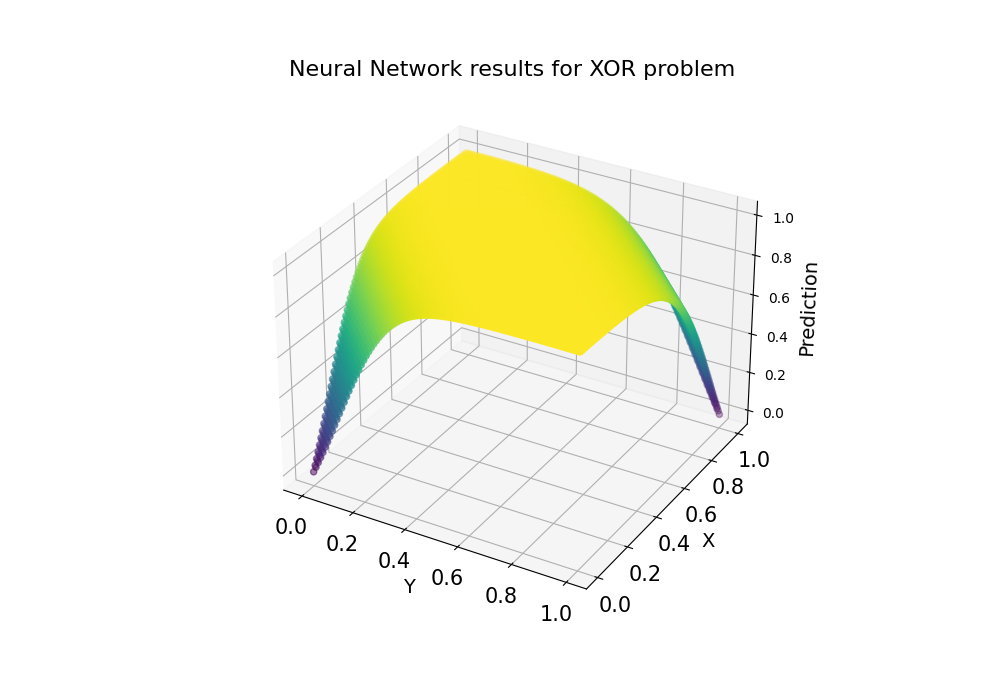

In [12]:
%matplotlib widget

nPoints = 100

xGrid, yGrid = np.meshgrid(np.linspace(0,1,nPoints), np.linspace(0,1,nPoints))
matriz = np.zeros((nPoints,nPoints))

for i_x in range(nPoints):
    for i_y in  range(nPoints):
        output = [[xGrid[i_x][i_y]],[yGrid[i_x][i_y]]]
        for layer in network:
            output = layer.foward(output)
        matriz[i_x][i_y] = output

x_flat = xGrid.flatten()
y_flat = yGrid.flatten()
z_flat = matriz.flatten()


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x_flat, y_flat, z_flat, c=z_flat, cmap='viridis')
ax.set_title('Neural Network results for XOR problem', fontsize=16)
ax.set_ylabel('X', fontsize=14)
ax.set_xlabel('Y', fontsize=14)
ax.set_zlabel("Prediction",fontsize=14)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)